In [1]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
from depthestimation import DepthEstimator
import matplotlib.pyplot as plt

In [2]:
estimator = DepthEstimator()
estimator.load_preset('C:/Users/Nabeel/projects/stereo-calibration/stereo presets/7_stereo_preset.json')
estimator.train_depth_mapping('C:/Users/Nabeel/projects/stereo-calibration/depth_map.npy')

reading preset in C:/Users/Nabeel/projects/stereo-calibration/stereo presets/7_stereo_preset.json
[[125.    ]
 [ 98.4375]
 [ 75.375 ]
 [ 62.8125]
 [ 54.    ]
 [ 47.3125]
 [ 42.125 ]
 [ 37.875 ]
 [ 34.375 ]
 [ 27.    ]
 [ 22.0625]
 [ 18.6875]
 [ 16.3125]
 [ 14.25  ]
 [ 13.375 ]
 [ 12.5   ]] [[ 300.]
 [ 400.]
 [ 500.]
 [ 600.]
 [ 700.]
 [ 800.]
 [ 900.]
 [1000.]
 [1100.]
 [1400.]
 [1700.]
 [2000.]
 [2300.]
 [2600.]
 [2800.]
 [3000.]]


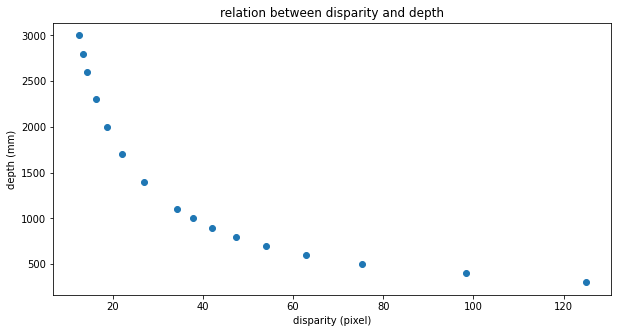

In [3]:
mapping = np.load('../depth_map.npy')
disp = [np.float32(value[0]) for value in mapping]
depth = [np.float32(value[1]) for value in mapping]

plt.figure(figsize=(10,5))

plt.ylabel('depth (mm)')
plt.xlabel('disparity (pixel)')
plt.title('relation between disparity and depth')
plt.scatter(disp, depth)

In [4]:
estimator.predict_depth(disparity=20)

257.6822280883789